In [1]:
import numpy as np
import pandas as pd

from scipy.stats import ks_2samp, pearsonr
from sklearn.preprocessing import StandardScaler

from monitor_models import *
from monitor import Monitor


%matplotlib inline

#### Generate data from scratch

In [2]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

N_IN_PART = 10000
N_FEATURES = 4

X1, y1 = make_classification(n_samples=N_IN_PART, n_features=N_FEATURES, n_informative=N_FEATURES, n_redundant=0, n_repeated=0, 
                             n_classes=2, n_clusters_per_class=2, weights=None, flip_y=0.0, class_sep=1.0, 
                             hypercube=True, shift=0.0, scale=1.0, shuffle=True, random_state=1)
X1 = pd.DataFrame(X1)
X1['part'] = [1 for _ in range(N_IN_PART)]

X2, y2 = make_classification(n_samples=N_IN_PART, n_features=N_FEATURES, n_informative=N_FEATURES, n_redundant=0, n_repeated=0, 
                             n_classes=2, n_clusters_per_class=2, weights=None, flip_y=0.0, class_sep=1.0, 
                             hypercube=True, shift=0.0, scale=1.0, shuffle=True, random_state=1)
X2 = pd.DataFrame(X2)
X2['part'] = [2 for _ in range(N_IN_PART)]

X3, y3 = make_classification(n_samples=N_IN_PART, n_features=N_FEATURES, n_informative=N_FEATURES, n_redundant=0, n_repeated=0, 
                             n_classes=2, n_clusters_per_class=2, weights=None, flip_y=0.0, class_sep=1.0, 
                             hypercube=True, shift=0.0, scale=1.0, shuffle=True, random_state=1)
X3 = pd.DataFrame(X3)
X3['part'] = [3 for _ in range(N_IN_PART)]

lr = LogisticRegression(random_state=1)
lr.fit(X1, y1)
preds1 = lr.predict_proba(X1)[:,1]
preds2 = lr.predict_proba(X2)[:,1]
preds3 = lr.predict_proba(X3)[:,1]

X_all = pd.concat([X1,X2,X3])
RS_all = np.concatenate([preds1,preds2,preds3])
X_all['score'] = RS_all
X_all.to_csv('test_data_mon.csv', index=False)

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


#### Set up an experiment

In [3]:
def run_experiment(path_to_data, batch_size, cumsize, stattest, rmodel, iomodel):
    '''
    rmodel: 
      type of model for reconstruction loss
    '''
    
    data = pd.read_csv(path_to_data)
    features, risk_scores = data.drop(['score', 'part'], axis=1), data['score']
    
    # Feature scaling to prevent shift problems
    scaler = StandardScaler()
    features = pd.DataFrame(scaler.fit_transform(features), columns=features.columns)
    features['part'] = data['part']
        
    # Adapt training data to PyTorch model
    # Training data: FIRST part of dataset
    if 'forward' in dir(rmodel):
        training_data = np.matrix(features[features['part'].isin([0])].drop(['part'], axis=1)).astype('float32')
    else:
        training_data = features[features['part'].isin([0])].drop(['part'], axis=1)
    
    # Fit the model on the FIRST part of dataset
    rmodel.learn(training_data)
    
    # 
    monitor = Monitor(features, risk_scores, batch_size, cumsize, stattest, rmodel, iomodel)
    monitor.simulation()
    monitor.plot(type='loss')
    monitor.plot(type='stat')
    monitor.plot(type='pval')
    monitor.plot(type='corr')
    return monitor

#### Get generated data from external sources

In [4]:
from os import listdir
import re
from os.path import isfile, join
mypath = 'data/'
paths_to_data = sorted([('data/'+f, int(re.findall('x(\d+)\.csv', f)[0])) for f in listdir(mypath) if isfile(join(mypath, f))],
                       key=lambda x: x[1])

N_DATASETS = 1

Running ELLIPTICENVELOPE monitoring simulation:


C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:4861: RuntimeWarning: invalid value encountered in true_divide
  cdf1 = np.searchsorted(data1, data_all, side='right') / n1
C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:4867: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


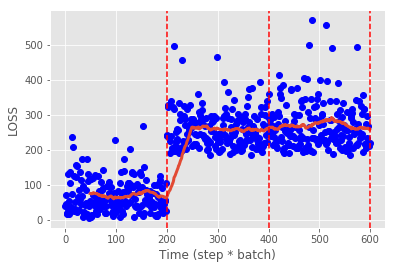

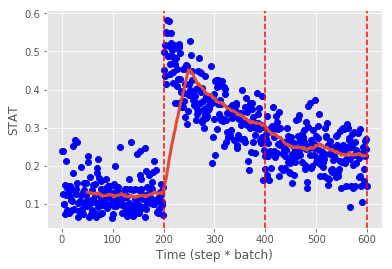

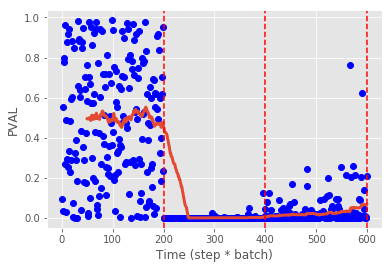

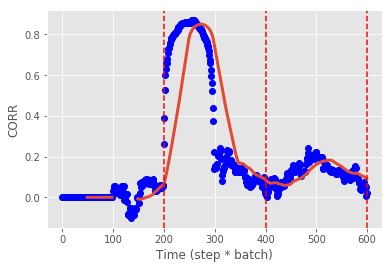

******************************
Running AUTOENCODER monitoring simulation:
Epoch: 20 train loss: 0.31596
Epoch: 40 train loss: 0.31184
Epoch: 60 train loss: 0.31138
Epoch: 80 train loss: 0.31125
Epoch: 100 train loss: 0.31117

C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:4861: RuntimeWarning: invalid value encountered in true_divide
  cdf1 = np.searchsorted(data1, data_all, side='right') / n1
C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:4867: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


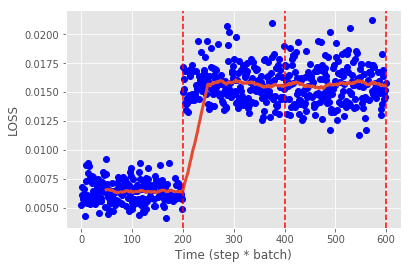

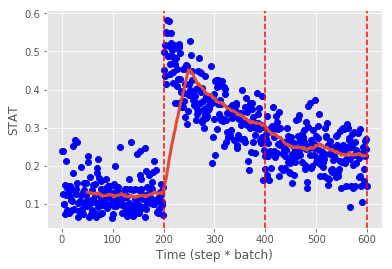

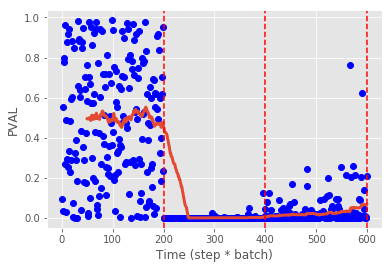

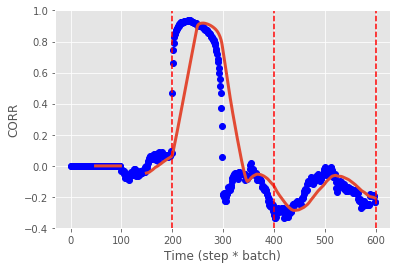

******************************
Running ONECLASSSVM monitoring simulation:


C:\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:4861: RuntimeWarning: invalid value encountered in true_divide
  cdf1 = np.searchsorted(data1, data_all, side='right') / n1
C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:4867: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Anaconda3\lib\site-

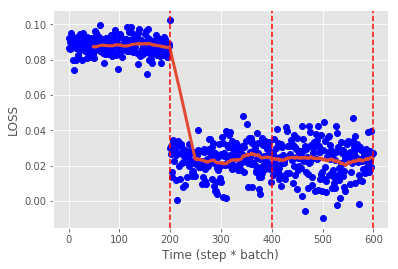

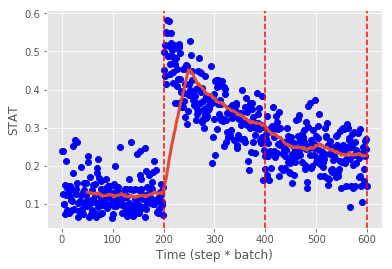

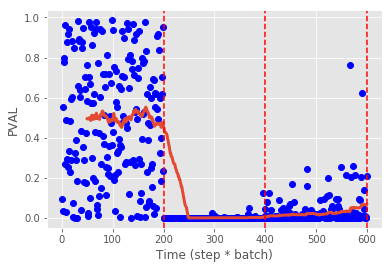

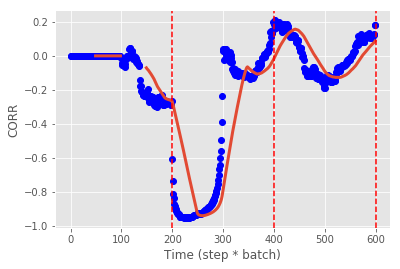

******************************
Running LOCALOUTLIERFACTOR monitoring simulation:


C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:4861: RuntimeWarning: invalid value encountered in true_divide
  cdf1 = np.searchsorted(data1, data_all, side='right') / n1
C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:4867: RuntimeWarning: divide by zero encountered in double_scalars
  prob = distributions.kstwobign.sf((en + 0.12 + 0.11 / en) * d)
C:\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


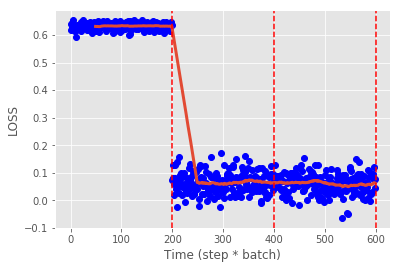

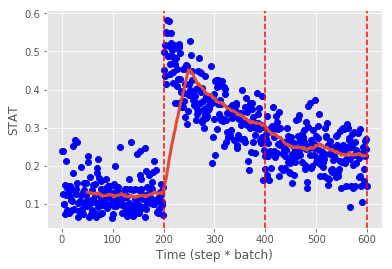

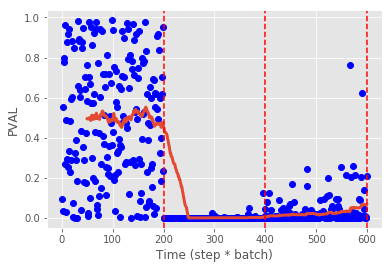

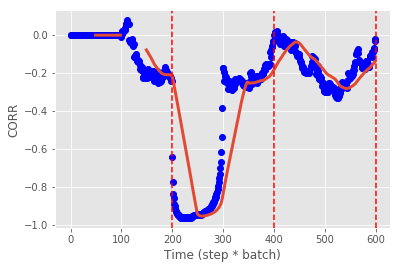

******************************


In [5]:
rmodels = {"EllipticEnvelope": EllipticEnvelopeExtended(contamination=0.0, random_state=1),
           "Autoencoder": DenseAE(),
           "OneClassSVM": OneClassSVMExtended(nu=0.001),
           "LocalOutlierFactor": LocalOutlierFactorExtended(contamination=0.001, novelty=True),
          }

for rmodel_name, rmodel in rmodels.items():
    print('Running %s monitoring simulation:'%rmodel_name.upper())
    monitors = []
    for path_to_data, nfeatures in paths_to_data[:N_DATASETS]:
        monitor = run_experiment(path_to_data=path_to_data, batch_size=50, cumsize=5, 
                                 stattest=ks_2samp, rmodel=rmodel, iomodel=pearsonr)
        monitors.append(monitor)
        print('*'*30)